In [7]:
# Modelling and Analysis of Data
# Exam 2022 : Date  17th - 25th of January
# Exam no: 39

# Question 7 (K-means Clustering & Principal Component Analysis, 7 points)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Had to use 'pip install nbformat' to get this working
from q7_Clustering import centroids, current_assignments, normalized_data as features 



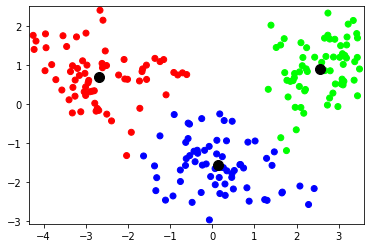

In [8]:
def __PCA(data):
    """
    Reused from A5 (modified slightly compared to my original submission in assignment 5)
    """
    data_cent = data - np.mean(data)
    cov_matrix = np.cov(data_cent.T)
    PCevals, PCevecs = np.linalg.eigh(cov_matrix)
    PCevals = np.flipud(PCevals) # vertical flip
    PCevecs = np.flip(PCevecs, axis=1) # horisontal flip
    return PCevals, PCevecs


def __transformData(features, PCevecs):
    """
    Reused from A5
    """
    return np.dot(features,  PCevecs[:, 0:2])

PCevals, PCevecs = __PCA(features)

# Convert data to two dimemsions using PCA
features2D = __transformData(features, PCevecs)
centroids2D = __transformData(centroids, PCevecs)

def __visualizeLabels(features, centroids, referenceLabels):
    """
    From A5 (modified)
    """

    plt.figure()
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    y = referenceLabels

    plt.scatter(features[:, 0], features[:, 1], c = y, cmap = cmap_bold)
    plt.scatter(centroids[:, 0], centroids[:,1], c = 'black', s=100)
    plt.xlim(features[:, 0].min() - 0.1, features[:, 0].max() + 0.1)
    plt.ylim(features[:, 1].min() - 0.1, features[:, 1].max() + 0.1)
    plt.show()

__visualizeLabels(features2D, centroids2D, current_assignments)
